<a href="https://colab.research.google.com/github/passer87/aidata/blob/main/%E4%BD%BF%E7%94%A8%E6%AD%B7%E5%8F%B2%E8%82%A1%E7%A5%A8%E6%95%B8%E6%93%9A%EF%BC%8C%E4%B8%A6%E5%9F%BA%E6%96%BC%E5%9D%87%E5%80%BC%E5%9B%9E%E6%AD%B8%E7%AD%96%E7%95%A5%E9%80%B2%E8%A1%8C%E5%A5%97%E5%88%A9%E6%93%8D%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed


股票之間的相關性:
Ticker      AAPL      MSFT
Ticker                    
AAPL    1.000000  0.839273
MSFT    0.839273  1.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

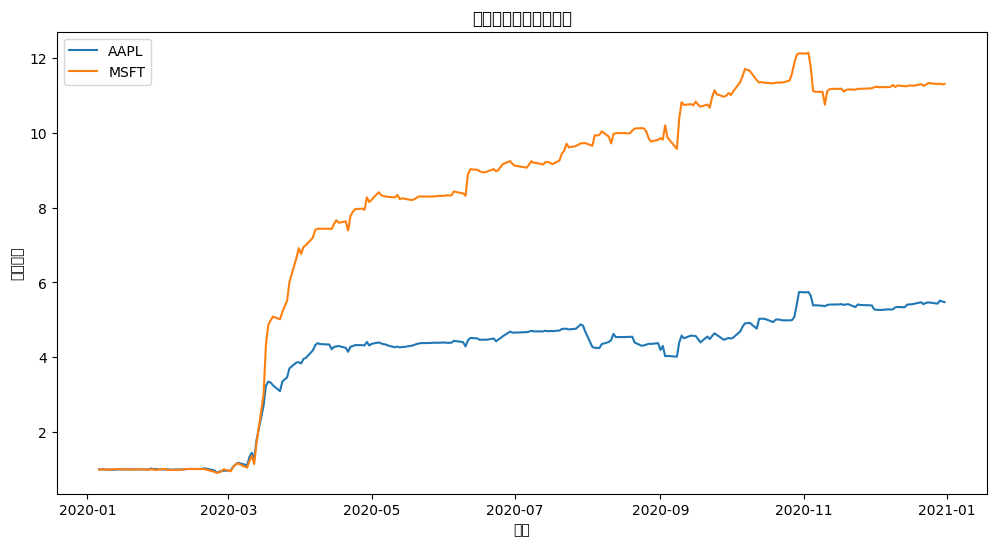

In [1]:
#使用歷史股票數據，並基於均值回歸策略進行套利操作
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 下載股票數據
tickers = ["AAPL", "MSFT"]
data = yf.download(tickers, start="2020-01-01", end="2021-01-01")["Adj Close"]

# 計算股票的日回報率
returns = data.pct_change().dropna()

# 計算股票之間的相關性
corr_matrix = returns.corr()
print("股票之間的相關性:")
print(corr_matrix)

# 簡單的均值回歸策略
mean_returns = returns.mean()
std_returns = returns.std()

# 設定交易門檻
threshold = 1.0

# 模擬交易
signals = (returns - mean_returns) / std_returns
positions = -signals
returns_strategy = returns * positions.shift(1)

# 累積回報
cumulative_returns = (1 + returns_strategy).cumprod()

# 繪製結果
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('統計套利策略模擬結果')
plt.xlabel('日期')
plt.ylabel('累積回報')
plt.legend(tickers)
plt.show()